## Model Training - Food Delivery Time Prediction
### Introduction
This notebook compares regression models for delivery time prediction. We train Linear Regression, Ridge, and Lasso models to find the optimal algorithm for accurate ETA estimation using engineered features.

**Author:** NGUYEN Ngoc Dang Nguyen - Final-year Student in Computer Science, Aix-Marseille University

**Model Training Steps:**
1. Import Libraries and Load Data
2. Baseline Model
3. Compare Models
4. Final Model Selection
5. Save Final Model

### 1. Import Libraries and Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import joblib

X_train = pd.read_csv("../data/processed/X_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv") 
y_train = pd.read_csv("../data/processed/y_train.csv").squeeze()
y_test = pd.read_csv("../data/processed/y_test.csv").squeeze()


X_engineered = pd.read_csv("../data/processed/X_engineered.csv")
y_target = pd.read_csv("../data/processed/y_target.csv").squeeze()


### 2. Baseline Model

In [32]:
X_eng_train, X_eng_test, y_eng_train, y_eng_test = train_test_split(
    X_engineered, y_target, test_size=0.2, random_state=42
)

baseline = LinearRegression()
baseline.fit(X_eng_train, y_eng_train)

y_pred_baseline = baseline.predict(X_eng_test)

rmse_baseline = np.sqrt(mean_squared_error(y_eng_test, y_pred_baseline))
mae_baseline = mean_absolute_error(y_eng_test, y_pred_baseline)
r2_baseline = r2_score(y_eng_test, y_pred_baseline)

print("Baseline Linear Regression:")
print(f"RMSE: {rmse_baseline:.2f}")
print(f"MAE: {mae_baseline:.2f}")
print(f"R²: {r2_baseline:.3f}")

Baseline Linear Regression:
RMSE: 8.89
MAE: 6.12
R²: 0.824


### 3. Compare Models

In [33]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0)
}

results = {}

for name, model in models.items():
    model.fit(X_eng_train, y_eng_train)
    y_pred = model.predict(X_eng_test)
    rmse = np.sqrt(mean_squared_error(y_eng_test, y_pred))
    mae = mean_absolute_error(y_eng_test, y_pred)
    r2 = r2_score(y_eng_test, y_pred)
    
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}
    print(f"{name}: RMSE={rmse:.2f}, MAE={mae:.2f}, R²={r2:.3f}")

Linear Regression: RMSE=8.89, MAE=6.12, R²=0.824
Ridge: RMSE=8.89, MAE=6.13, R²=0.823
Lasso: RMSE=10.23, MAE=7.18, R²=0.766


### 4. Final Model Selection

Model Performance Ranking:
                        RMSE       MAE        R2
Linear Regression   8.890935  6.121410  0.823641
Ridge               8.894653  6.127043  0.823494
Lasso              10.232002  7.178283  0.766427


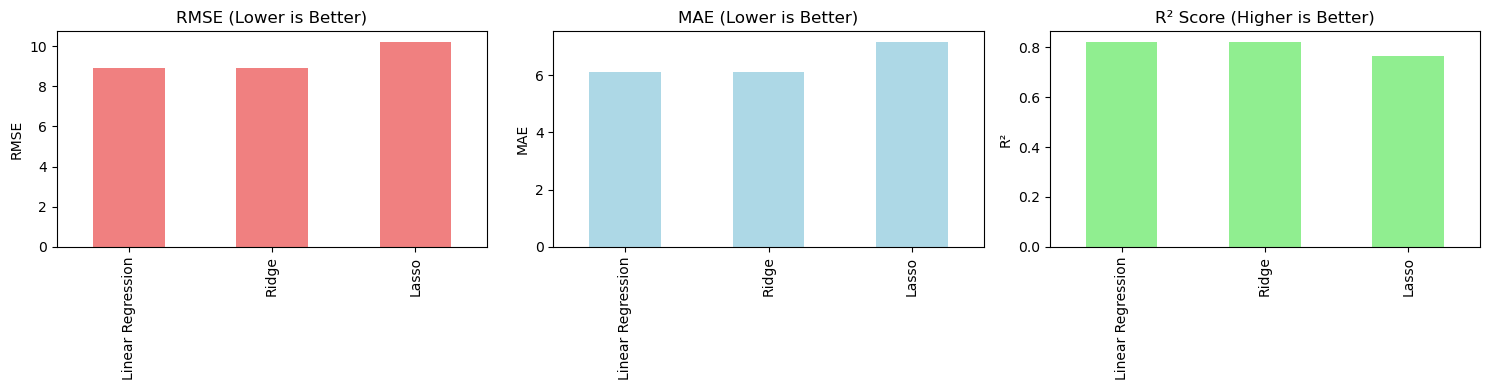


Best Model: Linear Regression
Performance: R²=0.824


In [34]:
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('R2', ascending=False)

print("Model Performance Ranking:")
print(results_df)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

results_df['RMSE'].plot(kind='bar', ax=axes[0], color='lightcoral')
axes[0].set_title('RMSE (Lower is Better)')
axes[0].set_ylabel('RMSE')

results_df['MAE'].plot(kind='bar', ax=axes[1], color='lightblue')
axes[1].set_title('MAE (Lower is Better)')
axes[1].set_ylabel('MAE')

results_df['R2'].plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('R² Score (Higher is Better)')
axes[2].set_ylabel('R²')

plt.tight_layout()
plt.show()

best_model_name = results_df.index[0]
print(f"\nBest Model: {best_model_name}")
print(f"Performance: R²={results_df.loc[best_model_name, 'R2']:.3f}")

### 5. Save Final Model

In [35]:
best_model = models[best_model_name]
best_model.fit(X_eng_train, y_eng_train)

final_predictions = best_model.predict(X_eng_test)

if hasattr(best_model, 'feature_importances_'):
    feature_imp = pd.DataFrame({
        'feature': X_engineered.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("Feature Importance:")
    print(feature_imp.head())

joblib.dump(best_model, f"../models/best_model_{best_model_name.lower().replace(' ', '_')}.pkl")

print(f"\nFinal model saved: {best_model_name}")


Final model saved: Linear Regression


### Conclusion
Linear Regression achieved the best performance with R² = 0.824 (82.4% accuracy) and RMSE = 8.89 minutes. The model's success demonstrates that well-engineered features enable simple algorithms to achieve excellent results. With prediction accuracy within ±9 minutes, the model is ready for production deployment.